<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/DecisionTree_Entropy_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Entropy in DecisionTree***
##### ***Entropy is measure of disorder or Measure of Purity / Impurity***
##### ***In Classificational data if we have balanced output then their will be entropy is more and if we have biased output then their will be entropy more***
##### ***Formula for 2 classificational data entropy --> E = -Pyes log2(Pyes) - Pno log2(Pno) --> In this we are calculating probability for yes and no and multipltying with log2***
##### ***If we have 2 classificational data min entropy is 0 and max entropy i 1 and for 3 classificational data min entropy is 0 and max entropy is greater than 1***

In [1]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/Placement.csv")
df

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0
...,...,...,...,...
95,96,4.3,200,0
96,97,4.4,42,0
97,98,6.7,182,1
98,99,6.3,103,1


In [ ]:
# lets find the entropy:
# first we cal class probabilities:
P_0 = df[df.Placement == 0].Placement.shape[0]/df.shape[0]
p_1 = df[df.Placement == 1].Placement.shape[0]/df.shape[0]

In [ ]:
Entropy = -P_0 * np.log2(P_0) - p_1 *np.log2(p_1)
Entropy

1.0

In [ ]:
# Here Entropy 1 means we have data in disorder:
# simple approach to chcek the data is in disorder like
df.Placement.value_counts()

1    50
0    50
Name: Placement, dtype: int64

in this fig we have data in disorder thats why we are getting high Entropy which is = 1



<Axes: xlabel='CGPA', ylabel='IQ'>

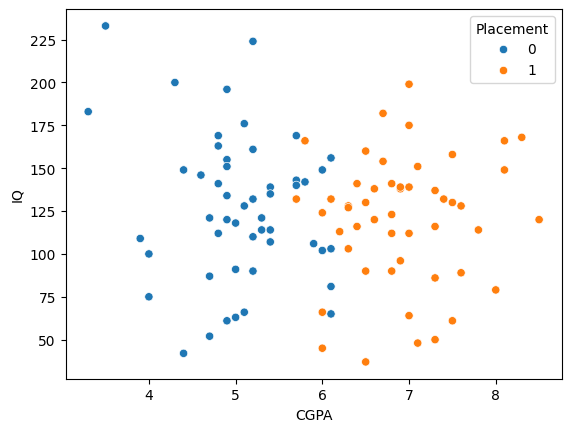

In [ ]:
# lets see entropy by plotting:
print(f"in this fig we have data in disorder thats why we are getting high Entropy which is = 1\n")
sns.scatterplot(data=df,x="CGPA",y="IQ",hue='Placement')


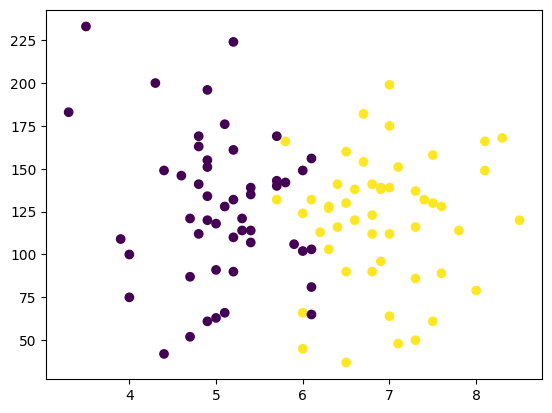

In [ ]:
# Approch by matplotlib
plt.scatter(df.CGPA,df.IQ,c=df.Placement)

In [ ]:
# suppose if we have continous data then we can find the entropy with kdeplot lets import the dataset:
# if we have high peaked kdeplot then entropy will be less
# if we have low peaked kdeplot then entropy will be high
ndf = pd.read_csv("/content/Salary_Data.csv")
ndf

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


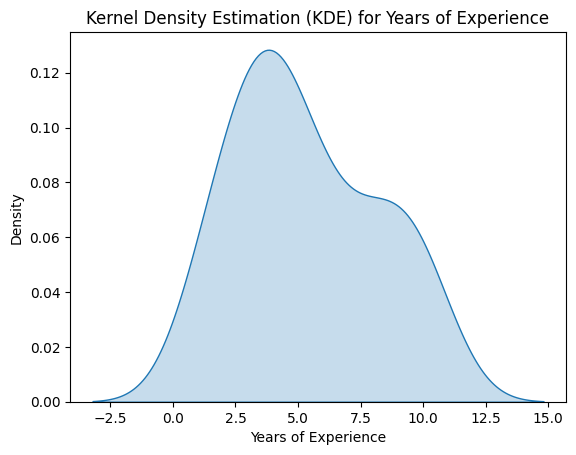

In [ ]:
# lets see the kdeplot:
sns.kdeplot(data=ndf, x='YearsExperience', fill=True)
plt.title('Kernel Density Estimation (KDE) for Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Density')
plt.show()
# here we are getting the high peaked curve so entropy will be less

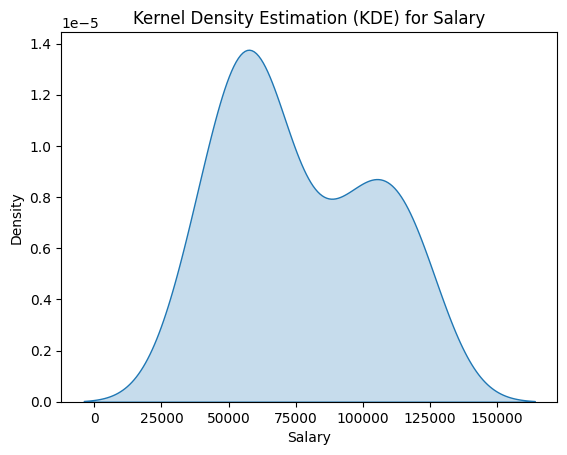

In [ ]:
# kde plot for Salary:
sns.kdeplot(data=ndf, x='Salary', fill=True)
plt.title('Kernel Density Estimation (KDE) for Salary')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()

In [4]:
df

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0
...,...,...,...,...
95,96,4.3,200,0
96,97,4.4,42,0
97,98,6.7,182,1
98,99,6.3,103,1


In [10]:
df.Placement.value_counts()

1    50
0    50
Name: Placement, dtype: int64

In [7]:
# import libraries to build the model :
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree

In [6]:
X = df.iloc[:,:-1]
y = df['Placement']

### ***Modeling***

In [8]:
model = DecisionTreeClassifier()

### ***Standardization***
##### ***basically in decision tree we dont need to do standardiztaion beacuse there will be not impact on model performance after standardizing the values***

### ***Data Splitting***

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
x_train.shape,x_test.shape

((70, 3), (30, 3))

In [13]:
# train:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
# test:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1])

In [15]:
y_test.values

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1])

In [16]:
# lets see the model accuracy
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test,y_pred)*100

93.33333333333333

Root Node is CGPA according to this feature rest of data is splitted

Here Root Node CGPA has high Information gain



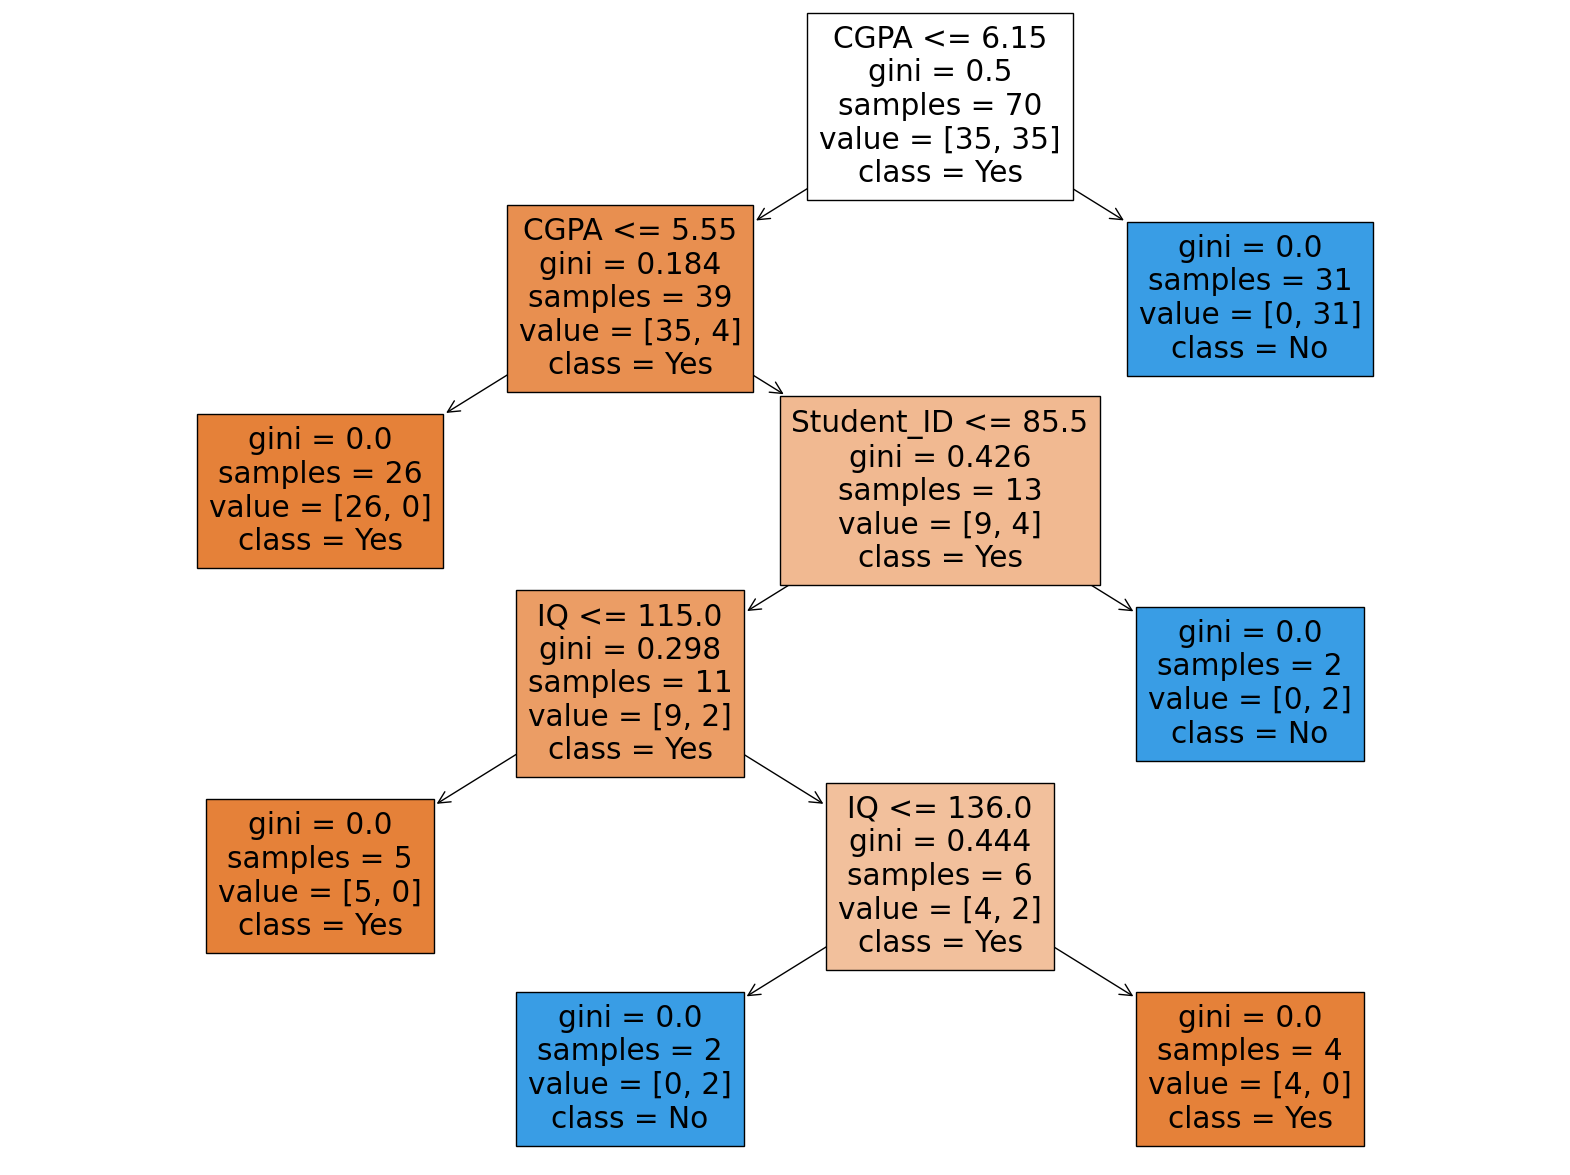

In [23]:
# Lets plot the tree:
print(f"Root Node is CGPA according to this feature rest of data is splitted\n")
print(f"Here Root Node CGPA has high Information gain\n")
plt.figure(figsize=(20,15))
tree.plot_tree(model,feature_names=X.columns,class_names=['Yes','No'],filled=True);